# Danh sách sinh viên:
## 52100413 _ Nguyễn Thái Hòa
## 52100697 _ Phan Thị Thùy Linh
## 52100489 _ Trần Thị Anh Thư

## Áp dụng các kỹ thuật tránh Overfiting trên các mô hình 

In [4]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


import seaborn as sns
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import log_loss
from imblearn.metrics import geometric_mean_score
import warnings
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from vecstack import stacking
from scipy import stats
import os


#For model building
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
import statsmodels.api as sm



In [5]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df_copy= df.copy()
df_copy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df_copy['restecg'].replace(['normal', 'st-t abnormality', 'lv hypertrophy'],[0,1,2],inplace=True)
df_copy['exng'].replace([True,False],[1,0],inplace=True)
df_copy

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
df_copy['fbs'].replace([True,False],[1,0],inplace=True)
df_copy

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
## Checking missing entries in the dataset columnwise
df_copy.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
df_copy.shape

(303, 14)

In [11]:
# summary statistics of numerical columns
df_copy.describe(include =[np.number])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
cat_cols = df[['caa', 'cp', 'restecg', 'exng', 'sex', 'output']].copy()
cat_cols.head()

,caa,cp,restecg,exng,sex,output
0,0,3,0,0,1,1
1,0,2,1,0,1,1
2,0,1,0,0,0,1
3,0,1,1,0,1,1
4,0,0,1,1,0,1


In [13]:
num_cols = df[['age','trtbps','fbs','thalachh','oldpeak','slp','thall','chol']].copy()
num_cols.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol
0,63,145,1,150,2.3,0,1,233
1,37,130,0,187,3.5,0,2,250
2,41,130,0,172,1.4,2,2,204
3,56,120,0,178,0.8,2,2,236
4,57,120,0,163,0.6,2,2,354


In [14]:
sc = StandardScaler()
le = LabelEncoder()

In [15]:
for col in cat_cols.columns:
    cat_cols[col] = le.fit_transform(cat_cols[col])
        
sc_num_cols = sc.fit_transform(num_cols)
num_cols = pd.DataFrame(sc_num_cols,columns = num_cols.columns)

In [16]:
cat_cols.head()

,caa,cp,restecg,exng,sex,output
0,0,3,0,0,1,1
1,0,2,1,0,1,1
2,0,1,0,0,0,1
3,0,1,1,0,1,1
4,0,0,1,1,0,1


In [17]:
num_cols.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol
0,0.952197,0.763956,2.394438,0.015443,1.087338,-2.274579,-2.148873,-0.256334
1,-1.915313,-0.092738,-0.417635,1.633471,2.122573,-2.274579,-0.512922,0.072199
2,-1.474158,-0.092738,-0.417635,0.977514,0.310912,0.976352,-0.512922,-0.816773
3,0.180175,-0.663867,-0.417635,1.239897,-0.206705,0.976352,-0.512922,-0.198357
4,0.290464,-0.663867,-0.417635,0.583939,-0.379244,0.976352,-0.512922,2.082050


In [18]:
df_final = pd.concat([num_cols,cat_cols],axis = 1)
df_final.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol,caa,cp,restecg,exng,sex,output
0,0.952197,0.763956,2.394438,0.015443,1.087338,-2.274579,-2.148873,-0.256334,0,3,0,0,1,1
1,-1.915313,-0.092738,-0.417635,1.633471,2.122573,-2.274579,-0.512922,0.072199,0,2,1,0,1,1
2,-1.474158,-0.092738,-0.417635,0.977514,0.310912,0.976352,-0.512922,-0.816773,0,1,0,0,0,1
3,0.180175,-0.663867,-0.417635,1.239897,-0.206705,0.976352,-0.512922,-0.198357,0,1,1,0,1,1
4,0.290464,-0.663867,-0.417635,0.583939,-0.379244,0.976352,-0.512922,2.082050,0,0,1,1,0,1


In [19]:
X = df_final.drop("output",axis = 1)
y = df_final.output


In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=142, stratify=y)

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7


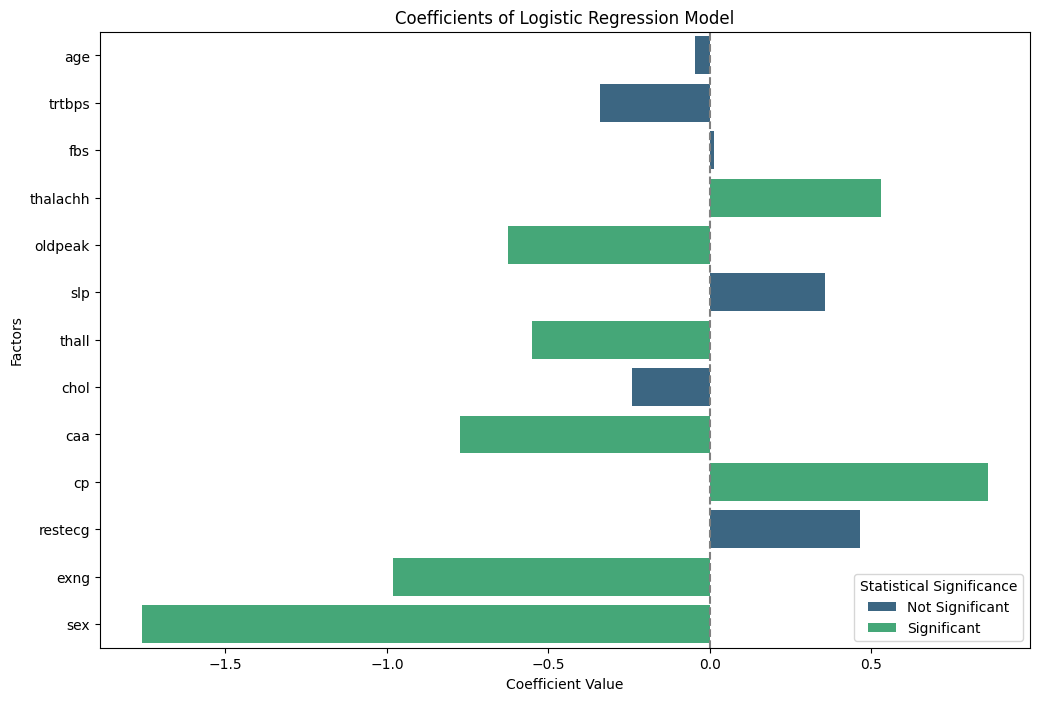

,Factors,Coefficients,P-Values,Significance
0,age,-0.044506,0.832266,Not Significant
1,trtbps,-0.341020,0.059582,Not Significant
2,fbs,0.012406,0.947464,Not Significant
3,thalachh,0.530772,0.026485,Significant
4,oldpeak,-0.626263,0.011523,Significant
5,slp,0.356383,0.097717,Not Significant
6,thall,-0.550403,0.001910,Significant
7,chol,-0.239592,0.220873,Not Significant
8,caa,-0.773349,0.000051,Significant
9,cp,0.859851,0.000004,Significant


In [21]:
X = df_final.drop("output",axis = 1)
y = df_final.output

# Adding a constant to the model (intercept)
X_const = sm.add_constant(X)

# Building the logistic regression model
model = sm.Logit(y, X_const)
result = model.fit()

# Extracting coefficients and p-values
coefficients = result.params[1:]  # Excluding the intercept
p_values = result.pvalues[1:]  # Excluding the intercept for p-values

# Creating a dataframe for visualization
viz_df = pd.DataFrame({
    'Factors': coefficients.index,
    'Coefficients': coefficients.values,
    'P-Values': p_values.values
})

# Adding a column for the significance of coefficients
viz_df['Significance'] = np.where(viz_df['P-Values'] <= 0.05, 'Significant', 'Not Significant')

# Plotting the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficients', y='Factors', data=viz_df, hue='Significance', dodge=False, palette='viridis')
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Factors')
plt.axvline(x=0, color='grey', linestyle='--')
plt.legend(title='Statistical Significance', loc='lower right')

plt.show()

viz_df

In [22]:
# Filter significant features based on p-values
significant_features = viz_df[viz_df['Significance'] == 'Significant']['Factors'].tolist()

# Keep only significant features in the DataFrame X
X_filtered = X[significant_features]

# Display the DataFrame with only significant features
print(X_filtered.head())


   thalachh   oldpeak     thall  caa  cp  exng  sex
0  0.015443  1.087338 -2.148873    0   3     0    1
1  1.633471  2.122573 -0.512922    0   2     0    1
2  0.977514  0.310912 -0.512922    0   1     0    0
3  1.239897 -0.206705 -0.512922    0   1     0    1
4  0.583939 -0.379244 -0.512922    0   0     1    0


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_filtered,y,test_size=0.3,random_state=142, stratify=y)

# SVM

In [24]:
from sklearn.svm import SVC

svm = SVC(probability=True)  
svm.fit(X_train, y_train)  
y_pred_svm = svm.predict(X_test)  

# Random Forest Classifier (criterion = 'entropy')

In [25]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

# K nearest neighbour (n=9)

In [26]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

# Adaboost Classifier

In [27]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

# Stacking with libary
khi sử dụng kỹ thuật Xếp chồng (Stacking), điểm chính xác gần với Random forest, cho thấy rằng việc xếp chồng có thể tránh overfiting, cho giá trị rất tôt như mô hình tốt nhất trong 5 mô hình đang được sử dụng để nghiên cứu 

# About OVERFITTING

# Curse of dimensionality
đề cập đến vấn đề có quá nhiều tính năng (kích thước), so với các điểm dữ liệu (ví dụ). Cách phổ biến nhất để giải quyết vấn đề này là thêm thông tin.

<Axes: >

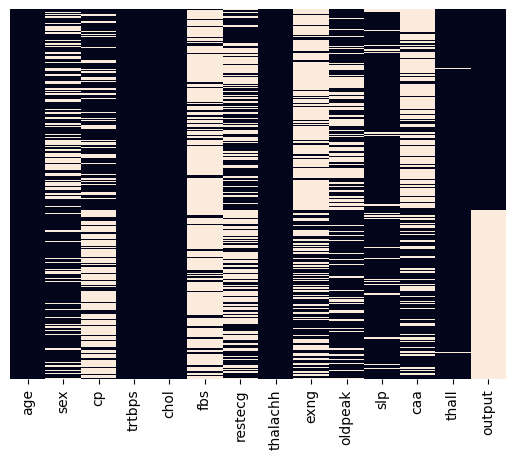

In [28]:
##Check giá trị impossible 
sns.heatmap(df_copy==0,cbar=False,yticklabels=False)

In [29]:
data_numerical = df_copy[["age","trtbps","chol","thalachh","oldpeak","output"]]
data_numerical

,age,trtbps,chol,thalachh,oldpeak,output
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,0
301,57,130,131,115,1.2,0


In [30]:
data_nominal = df_copy.drop(data_numerical,axis=1)
data_nominal['output'] = df_copy['output']
data_nominal

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


# Train với KNN thể hiện sự overfitting của tập dữ liệu

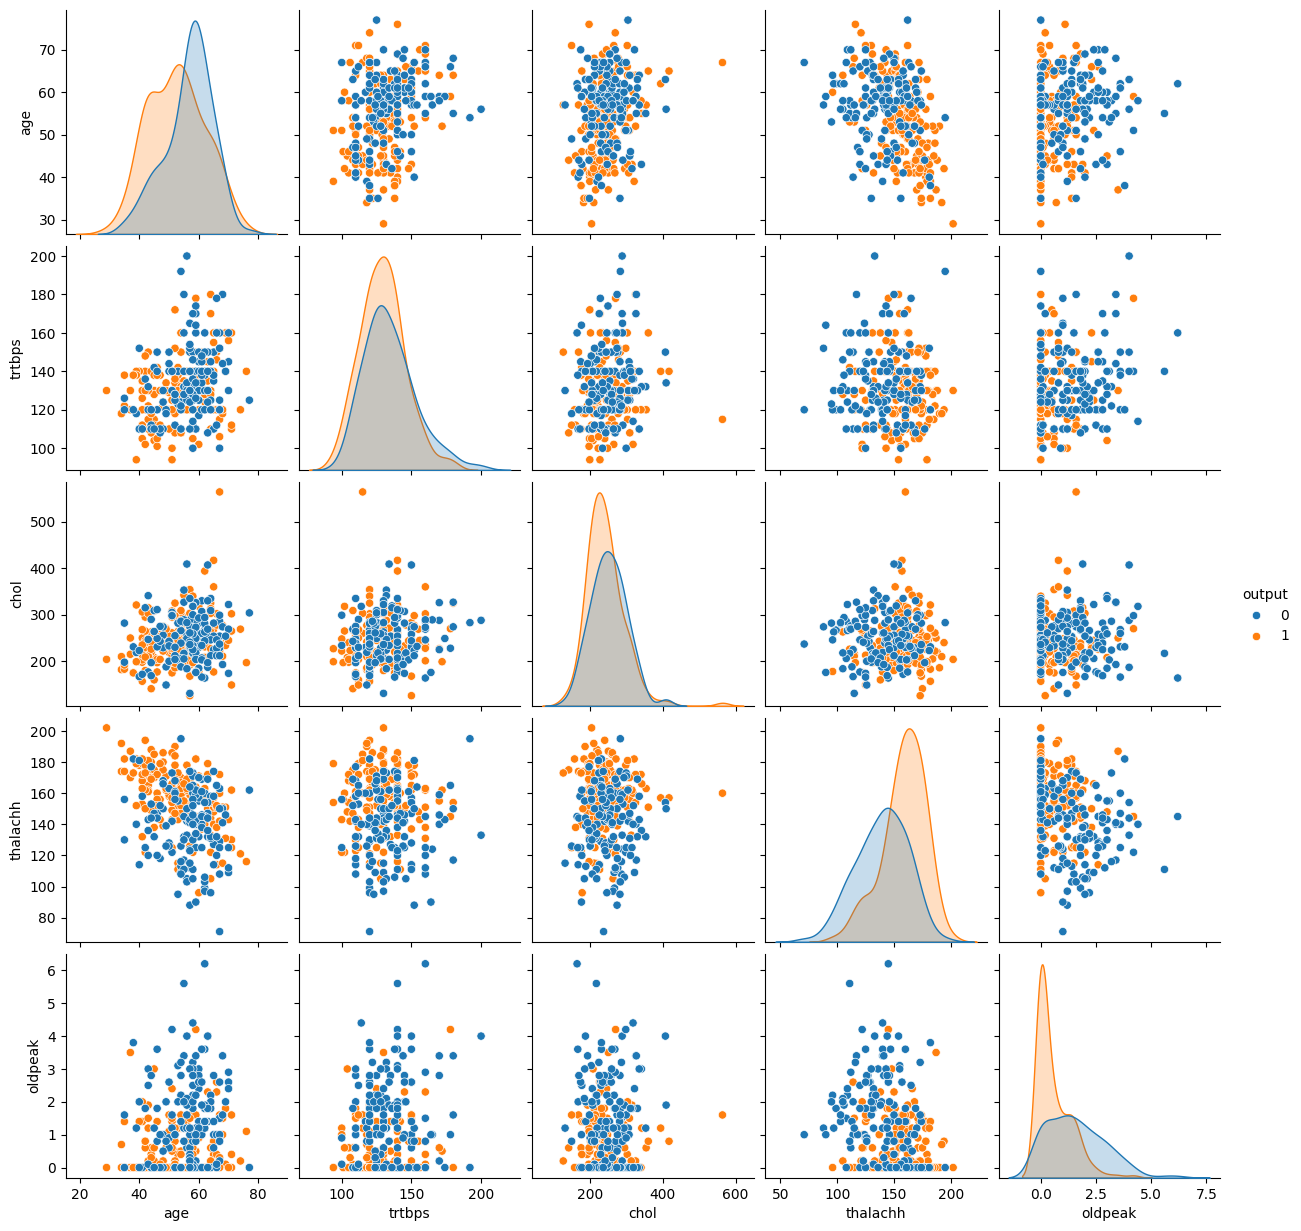

In [31]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

In [32]:
features = []
for column in df.columns:
    if column != 'output':
        features.append(column)
X = df[features]
y = df['output']

In [33]:
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import AgglomerativeClustering 
import warnings
import os
warnings.filterwarnings("ignore")
#First Model
kf = KFold(n_splits=4)
mae_train = []
mae_test = []
for train_index, test_index in kf.split(X):
    
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y[train_index], y[test_index]
   model = KNeighborsClassifier(n_neighbors=2)
   model.fit(X_train, y_train)
   
   y_train_pred = model.predict(X_train)
   y_test_pred = model.predict(X_test)
   mae_train.append(mean_absolute_error(y_train, y_train_pred))
   mae_test.append(mean_absolute_error(y_test, y_test_pred))

   print("First Model - Train mae: {} Test mae: {}".format(mae_train, mae_test))


First Model - Train mae: [0.19823788546255505] Test mae: [0.7368421052631579]
First Model - Train mae: [0.19823788546255505, 0.18061674008810572] Test mae: [0.7368421052631579, 0.7763157894736842]
First Model - Train mae: [0.19823788546255505, 0.18061674008810572, 0.1762114537444934] Test mae: [0.7368421052631579, 0.7763157894736842, 0.27631578947368424]
First Model - Train mae: [0.19823788546255505, 0.18061674008810572, 0.1762114537444934, 0.16228070175438597] Test mae: [0.7368421052631579, 0.7763157894736842, 0.27631578947368424, 0.44]


In [34]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.56


In [35]:
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

42 / 75 correct


In [36]:
model.fit(X_train, y_train ) 
answer = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72        75
           1       0.00      0.00      0.00         0

    accuracy                           0.56        75
   macro avg       0.50      0.28      0.36        75
weighted avg       1.00      0.56      0.72        75



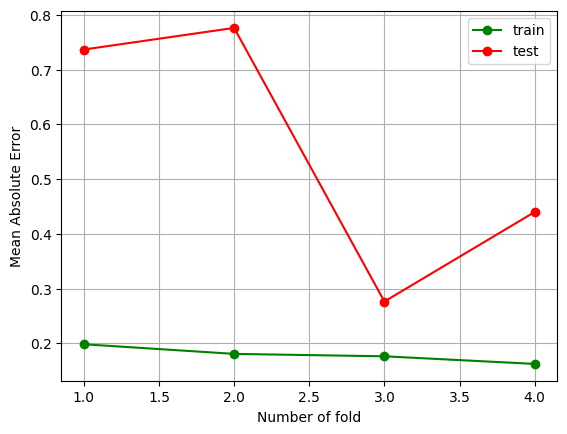

In [37]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

so sánh giữa Erorr của training set và test set, có thể thấy Erorrr của training set có giá trị rất nhỏ (từ biểu đồ có MAE hoặc Mean absolute error) thấp hơn 0,2, trong khi error Test set có giá trị lớn hơn rất nhiều nằm trong khoảng 0,3 - 0,8.
Có thể nói rằng trong khi huấn luyện mô hình này, có thể cho kết quả dự đoán chính xác. Tuy nhiên, khi áp dụng cho tập dữ liệu mới (Test set), sai số sẽ lớn hơn đáng kể. Điều này cho thấy tình trạng overfitting của tập dữ liệu này.

# Thể Hiện Dữ liệu mất cân bằng với 5 mô hình

In [201]:
X = df_copy.drop('output',axis=1) 
y = df_copy['output']
X_train,X_test,y_train,y_test = train_test_split(X_filtered,y,test_size=0.3,random_state=142, stratify=y)

In [202]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,f1_score,precision_score

In [203]:
#Đánh giá 5 mô hình: RandomForestClassifier, SVM, KNeighborsClassifier, AdaBoostClassifier, MLPClassifier satcking

accuracy_scoring = []
f1_scoring = []
precision_scoring = []
recall_scoring = []
roc_scoring = []
model_naming = []
train_score = []
test_score = []


def test_eval(model,X_test,y_test,model_name = "NONE"):
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)
    
    train_score.append(mean_absolute_error(y_train,model_pred_train))
    test_score.append(mean_absolute_error(y_test,model_pred_test))
    accuracy_scoring.append(accuracy_score(y_test,model_pred_test))
    f1_scoring.append(f1_score(y_test,model_pred_test))
    precision_scoring.append(precision_score(y_test,model_pred_test))
    recall_scoring.append(recall_score(y_test,model_pred_test))
    roc_scoring.append(roc_auc_score(y_test,model_pred_test))
    model_naming.append(model_name)    

In [204]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

pipe_rf = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("forest",RandomForestClassifier(criterion= 'entropy', max_features= 'sqrt', n_estimators= 100))])

pipe_svm = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("svm",SVC(C= 100, gamma= 1, kernel= 'rbf'))])

pipe_knn = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("knn",KNeighborsClassifier(algorithm = 'auto', n_neighbors = 3, weights = 'distance'))])

pipe_ada = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("ada",AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate = 0.5, n_estimators = 1000))])

pipe_mlp = Pipeline([('scaler',StandardScaler()),
                   ('pca',PCA(n_components=0.95)),
                   ('mlp',MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=300,
                                        activation='relu',solver='adam', random_state=1))])

ensemble_model = [("forest",pipe_rf),("svm",pipe_svm),("knn",pipe_knn),("ada",pipe_ada),("mlp",pipe_mlp)]

pipe_stacking = Pipeline([("Stacking",StackingClassifier(estimators=ensemble_model, 
                                                         final_estimator=LogisticRegression(random_state=101)))])

final_models = [pipe_rf,pipe_svm,pipe_knn,pipe_ada,pipe_mlp,pipe_stacking]
model_names = {0:"Random Forest",1:"SVM",2:"KNN",3:"AdaBoost",4:"Stacking"}

In [47]:
skf = StratifiedKFold(n_splits=10)

In [48]:
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    
    #random forest
    final_models[0].fit(X_train,y_train)
    test_eval(final_models[0],X_test,y_test,model_names[0])
    
    #svm
    final_models[1].fit(X_train,y_train)
    test_eval(final_models[1],X_test,y_test,model_names[1])
    
    #knn
    final_models[2].fit(X_train,y_train)
    test_eval(final_models[2],X_test,y_test,model_names[2])
    
    #adaboost
    final_models[3].fit(X_train,y_train)
    test_eval(final_models[3],X_test,y_test,model_names[3])
    
    #stacking
    final_models[4].fit(X_train,y_train)
    test_eval(final_models[4],X_test,y_test,model_names[4])

In [44]:
res_df = pd.DataFrame({'Train':train_score,'Test':test_score,'Accuracy Score':accuracy_scoring,'F1-Score':f1_scoring,
                       'Precsion':precision_scoring,'Recall':recall_scoring,'ROC AUC Score':roc_scoring,'Model':model_naming})

In [45]:
forest_res = res_df[res_df['Model'] == 'Random Forest']
svm_res = res_df[res_df['Model'] == 'SVM']
knn_res = res_df[res_df['Model'] == 'KNN']
ada_res = res_df[res_df['Model'] == 'AdaBoost']
stacking_res = res_df[res_df['Model'] == 'Stacking']

model_compile = [forest_res,svm_res,knn_res,ada_res,stacking_res]

# Trực quan hóa dữ liệu quá fix với 5 mô hình

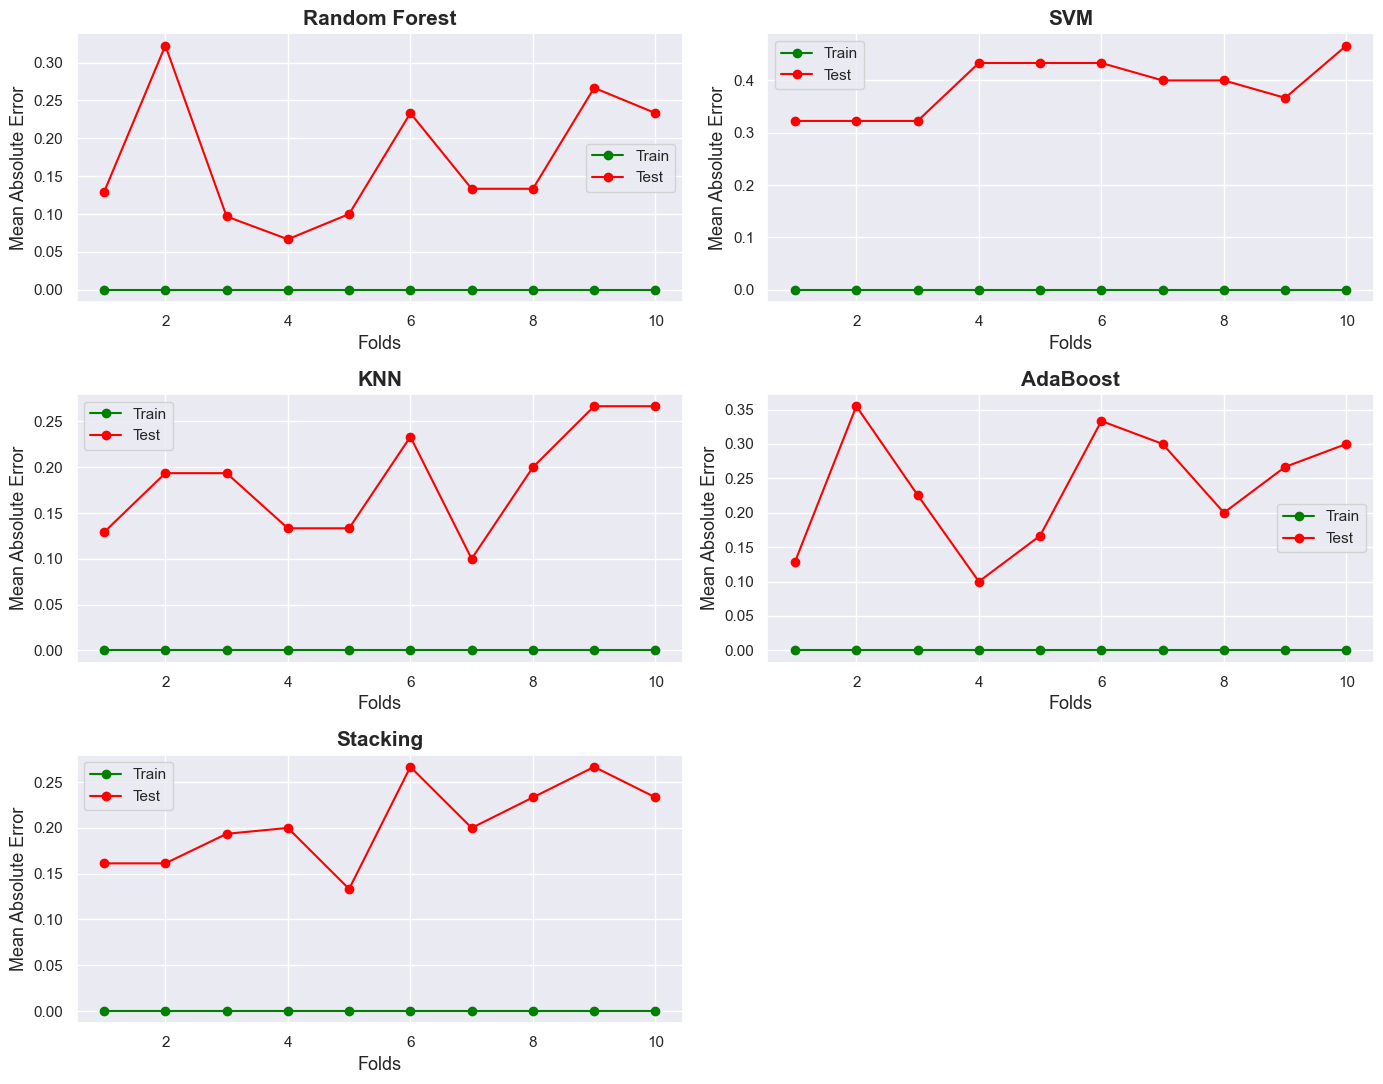

In [46]:
sns.set(rc={"figure.figsize":(14, 11)})

folds = range(1,skf.get_n_splits()+1)
for i,models in enumerate(model_compile):
    plt.subplot(3,2,i+1)
    plt.plot(folds,models["Train"],'o-',color='green',label="Train")
    plt.plot(folds,models["Test"],'o-',color='red',label="Test")
    plt.xlabel("Folds",fontsize=13)
    plt.ylabel("Mean Absolute Error",fontsize=13)
    plt.title(model_names[i],fontsize=15,fontweight='bold')
    plt.legend()

plt.tight_layout()

# Giản over Fitting và cải thiện độ chính xác của mô hình:
tất cả các mô hình đều quá phù hợp do phạm vi giữa tập huấn luyện và tập thử nghiệm là khoảng 0,4. 


# Random Over Sampling
Áp dụng Random Over Sampling (Lấy mẫu ngẫu nhiên) để tránh mất cân bằng dữ liệu

In [49]:
sampler = RandomOverSampler()

X_sampler,y_sampler = sampler.fit_resample(X,y)

data_resample = pd.concat([X_sampler,y_sampler],axis=1)

In [50]:
X = data_resample.drop('output',axis=1) 
y = data_resample['output']

In [51]:
accuracy_scoring = []
f1_scoring = []
precision_scoring = []
recall_scoring = []
roc_scoring = []
model_naming = []
train_score = []
test_score = []


def test_eval(model,X_test,y_test,model_name = "NONE"):
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)
    
    
    train_score.append(mean_absolute_error(y_train,model_pred_train))
    test_score.append(mean_absolute_error(y_test,model_pred_test))
    accuracy_scoring.append(accuracy_score(y_test,model_pred_test))
    f1_scoring.append(f1_score(y_test,model_pred_test))
    precision_scoring.append(precision_score(y_test,model_pred_test))
    recall_scoring.append(recall_score(y_test,model_pred_test))
    roc_scoring.append(roc_auc_score(y_test,model_pred_test))
    model_naming.append(model_name)    

In [52]:
pipe_rf = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("forest",RandomForestClassifier(criterion= 'entropy', max_features= 'sqrt', n_estimators= 100))])

pipe_svm = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("svm",SVC(C= 100, gamma= 1, kernel= 'rbf'))])

pipe_knn = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("knn",KNeighborsClassifier(algorithm = 'auto', n_neighbors = 3, weights = 'distance'))])

pipe_ada = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("ada",AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate = 0.5, n_estimators = 1000))])

pipe_mlp = Pipeline([('scaler',StandardScaler()),
                   ('pca',PCA(n_components=0.95)),
                   ('mlp',MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=300,
                                        activation='relu',solver='adam', random_state=1))])

ensemble_model = [("forest",pipe_rf),("svm",pipe_svm),("knn",pipe_knn),("ada",pipe_ada),("mlp",pipe_mlp)]

pipe_stacking = Pipeline([("Stacking",StackingClassifier(estimators=ensemble_model, 
                                                         final_estimator=LogisticRegression(random_state=101)))])

final_models = [pipe_rf,pipe_svm,pipe_knn,pipe_ada,pipe_mlp,pipe_stacking]
model_names = {0:"Random Forest",1:"SVM",2:"KNN",3:"AdaBoost",4:"Stacking"}

In [53]:
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    
    #random forest
    final_models[0].fit(X_train,y_train)
    test_eval(final_models[0],X_test,y_test,model_names[0])
    
    #svm
    final_models[1].fit(X_train,y_train)
    test_eval(final_models[1],X_test,y_test,model_names[1])
    
    #knn
    final_models[2].fit(X_train,y_train)
    test_eval(final_models[2],X_test,y_test,model_names[2])
    
    #adaboost
    final_models[3].fit(X_train,y_train)
    test_eval(final_models[3],X_test,y_test,model_names[3])
    
    #stacking
    final_models[4].fit(X_train,y_train)
    test_eval(final_models[4],X_test,y_test,model_names[4])

In [54]:
res_df = pd.DataFrame({'Train':train_score,'Test':test_score,'Accuracy Score':accuracy_scoring,'F1-Score':f1_scoring,
                       'Precsion':precision_scoring,'Recall':recall_scoring,'ROC AUC Score':roc_scoring,'Model':model_naming})


In [55]:
forest_res = res_df[res_df['Model'] == 'Random Forest']
svm_res = res_df[res_df['Model'] == 'SVM']
knn_res = res_df[res_df['Model'] == 'KNN']
ada_res = res_df[res_df['Model'] == 'AdaBoost']
stacking_res = res_df[res_df['Model'] == 'Stacking']

model_compile = [forest_res,svm_res,knn_res,ada_res,stacking_res]

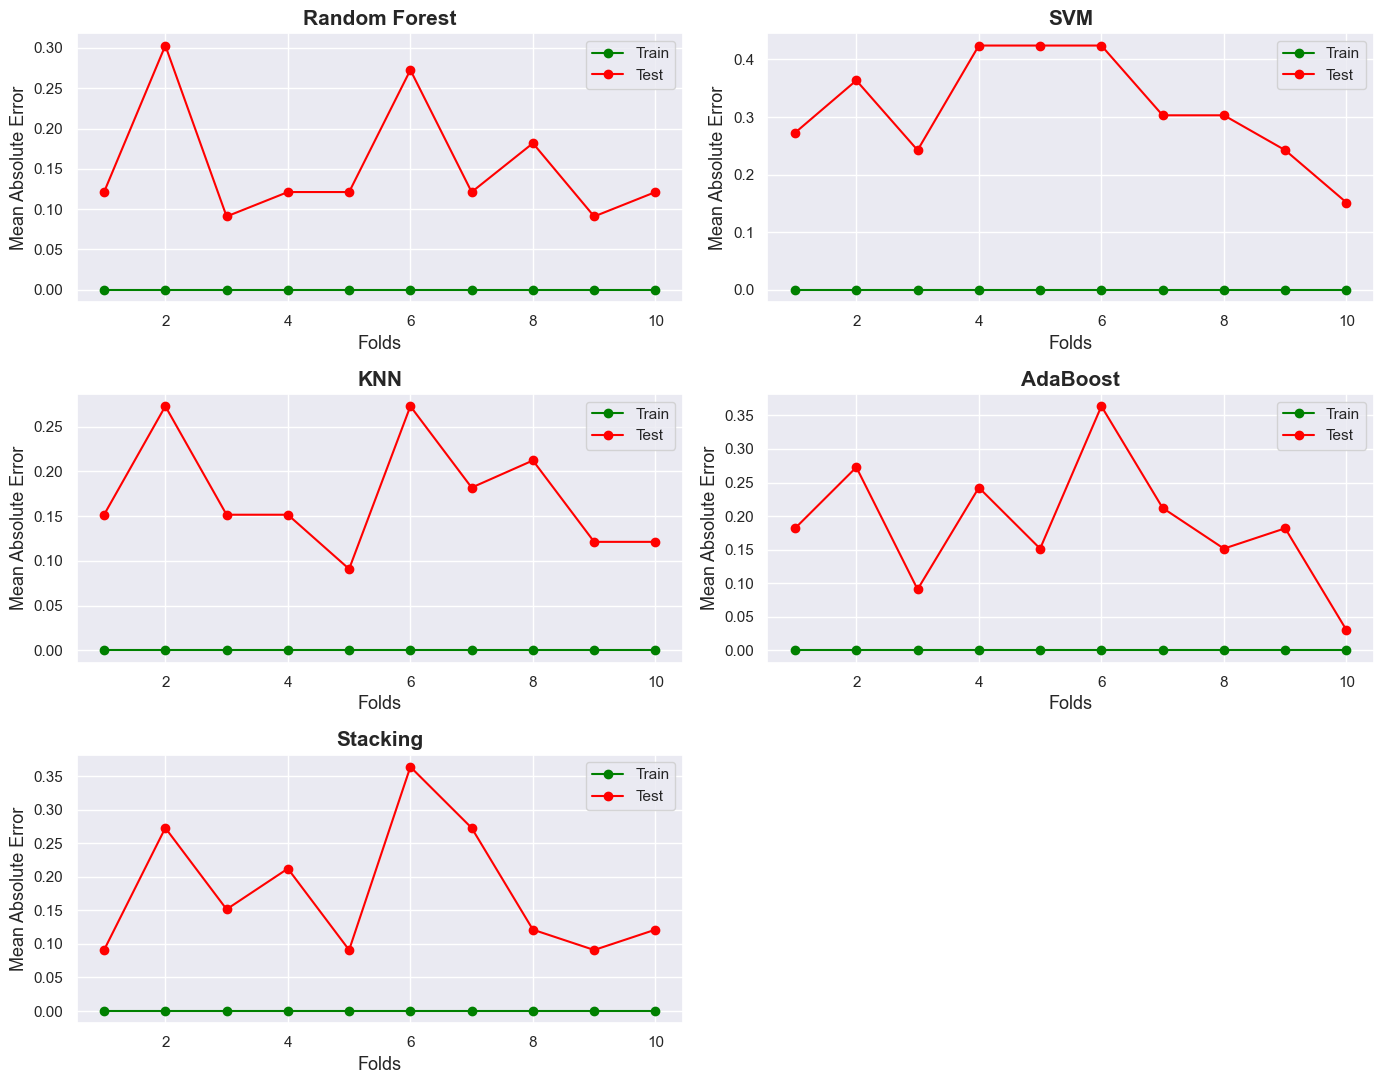

In [56]:
sns.set(rc={"figure.figsize":(14, 11)})

folds = range(1,skf.get_n_splits()+1)
for i,models in enumerate(model_compile):
    plt.subplot(3,2,i+1)
    plt.plot(folds,models["Train"],'o-',color='green',label="Train")
    plt.plot(folds,models["Test"],'o-',color='red',label="Test")
    plt.xlabel("Folds",fontsize=13)
    plt.ylabel("Mean Absolute Error",fontsize=13)
    plt.title(model_names[i],fontsize=15,fontweight='bold')
    plt.legend()

plt.tight_layout()

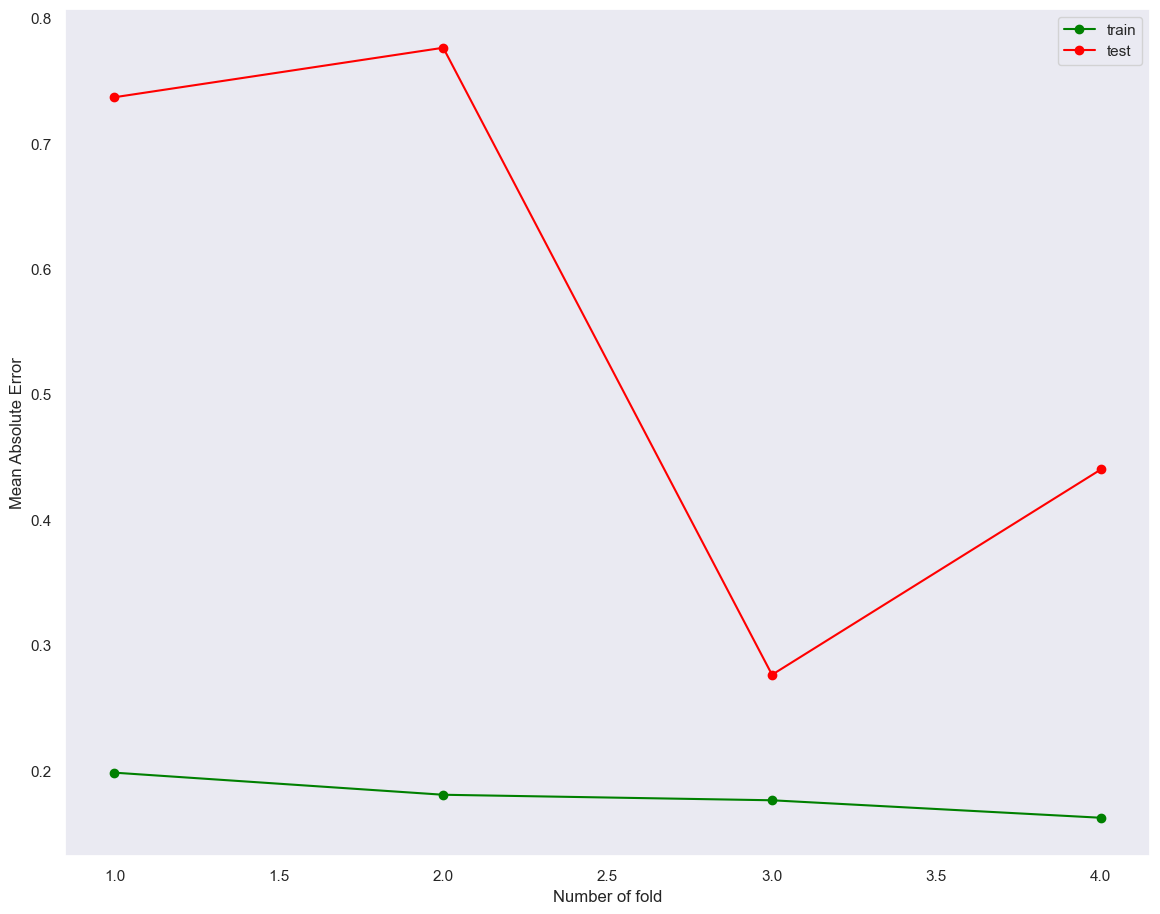

In [57]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

# Kết luận
Sau khi sử dụng phương pháp lấy mẫu quá mức ngẫu nhiên, mức độ overfiting của mô hình Heart.csv có xu hướng càng về sau càng giảm đi một chút như đã thấy trong các biếu đồ Random Forest, KNN và Stacking so với biểu đồ tương tự pử trên không sử dụng Random over sample

Mô hình không đạt được mức độ phù hợp như mong muốn, tuy nhiên khi áp dụng ROS , hiệu suất của mô hình được cải thiện một chút. Việc thêm nhiều dữ liệu hơn vào tập dữ liệu có thể là giải pháp để giải quyết triệt để tình trạng overfitting và điểm số liệu thấp.


# Đơn giản hóa mô hình với Staking classifier và KNN
Với hàm MinMaxScaler, nghĩa là chỉ chia tỷ lệ dữ liệu giữa các giá trị tối đa và tối thiểu. Điều này được thực hiện để dữ liệu không bị ảnh hưởng bởi dữ liệu ngoại lệ hoặc có các ngoại lệ.

In [153]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
for column in X.columns:
    feature = np.array(X[column]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(feature)
    feature_scaled = scaler.transform(feature)
    X[column] = feature_scaled.reshape(1,-1)[0]

In [154]:
X.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol,caa,cp,restecg,exng,sex
0,0.708333,0.481132,1.0,0.603053,0.370968,0.0,0.333333,0.244292,0.0,1.000000,0.0,0.0,1.0
1,0.166667,0.339623,0.0,0.885496,0.564516,0.0,0.666667,0.283105,0.0,0.666667,0.5,0.0,1.0
2,0.250000,0.339623,0.0,0.770992,0.225806,1.0,0.666667,0.178082,0.0,0.333333,0.0,0.0,0.0
3,0.562500,0.245283,0.0,0.816794,0.129032,1.0,0.666667,0.251142,0.0,0.333333,0.5,0.0,1.0
4,0.583333,0.245283,0.0,0.702290,0.096774,1.0,0.666667,0.520548,0.0,0.000000,0.5,1.0,0.0


In [155]:
import xgboost as xgboost
# selecting list of top performing models to be used in stacked ensemble method
models = [
    RandomForestClassifier(criterion='entropy',n_estimators=100),
    KNeighborsClassifier(9),
    SVC(probability=True),
    AdaBoostClassifier(),
    
]

In [156]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [RandomForestClassifier]
    fold  0:  [0.81395349]
    fold  1:  [0.79069767]
    fold  2:  [0.83333333]
    fold  3:  [0.73809524]
    fold  4:  [0.85714286]
    ----
    MEAN:     [0.80664452] + [0.04066719]
    FULL:     [0.80660377]

model  1:     [KNeighborsClassifier]
    fold  0:  [0.76744186]
    fold  1:  [0.67441860]
    fold  2:  [0.78571429]
    fold  3:  [0.73809524]
    fold  4:  [0.83333333]
    ----
    MEAN:     [0.75980066] + [0.05272225]
    FULL:     [0.75943396]

model  2:     [SVC]
    fold  0:  [0.79069767]
    fold  1:  [0.76744186]
    fold  2:  [0.78571429]
    fold  3:  [0.80952381]
    fold  4:  [0.85714286]
    ----
    MEAN:     [0.80210410] + [0.03060889]
    FULL:     [0.80188679]

model  3:     [AdaBoostClassifier]
    fold  0:  [0.67441860]
    fold  1:  [0.69767442]
    fold  2:  [0.71428571]
    fold  3:  [0.7

In [157]:
model = MLPClassifier()
    
model = model.fit(S_train, y_train)
y_pred_all = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred_all))

Final prediction score: [0.89010989]


In [158]:
Stackf = KFold(n_splits=4)
mae_train = []
mae_test = []
for train_index, test_index in Stackf.split(X):
    
   S_train, S_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y[train_index], y[test_index]

   model_af = MLPClassifier()
   model_af.fit(S_train, y_train)
   y_train_pred = model_af.predict(S_train)
   y_test_pred = model_af.predict(S_test)
   mae_train.append(mean_absolute_error(y_train, y_train_pred))
   mae_test.append(mean_absolute_error(y_test, y_test_pred))

   print("1 Solution - Train mae: {} Test mae: {}".format(mae_train, mae_test))

1 Solution - Train mae: [0.13215859030837004] Test mae: [0.2236842105263158]
1 Solution - Train mae: [0.13215859030837004, 0.10572687224669604] Test mae: [0.2236842105263158, 0.2894736842105263]
1 Solution - Train mae: [0.13215859030837004, 0.10572687224669604, 0.13215859030837004] Test mae: [0.2236842105263158, 0.2894736842105263, 0.23684210526315788]
1 Solution - Train mae: [0.13215859030837004, 0.10572687224669604, 0.13215859030837004, 0.11403508771929824] Test mae: [0.2236842105263158, 0.2894736842105263, 0.23684210526315788, 0.37333333333333335]


In [159]:
model_af.fit(S_train, y_train ) 
answer = model_af.predict(S_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        75
           1       0.00      0.00      0.00         0

    accuracy                           0.64        75
   macro avg       0.50      0.32      0.39        75
weighted avg       1.00      0.64      0.78        75



In [160]:
y_pred_Stackf = model_af.predict(S_test)
accuracy = accuracy_score(y_test, y_pred_Stackf)
print("Accuracy:", accuracy)

Accuracy: 0.64


In [161]:
print("{0} / {1} correct".format(np.sum(y_test == y_pred_Stackf), len(y_test)))

48 / 75 correct


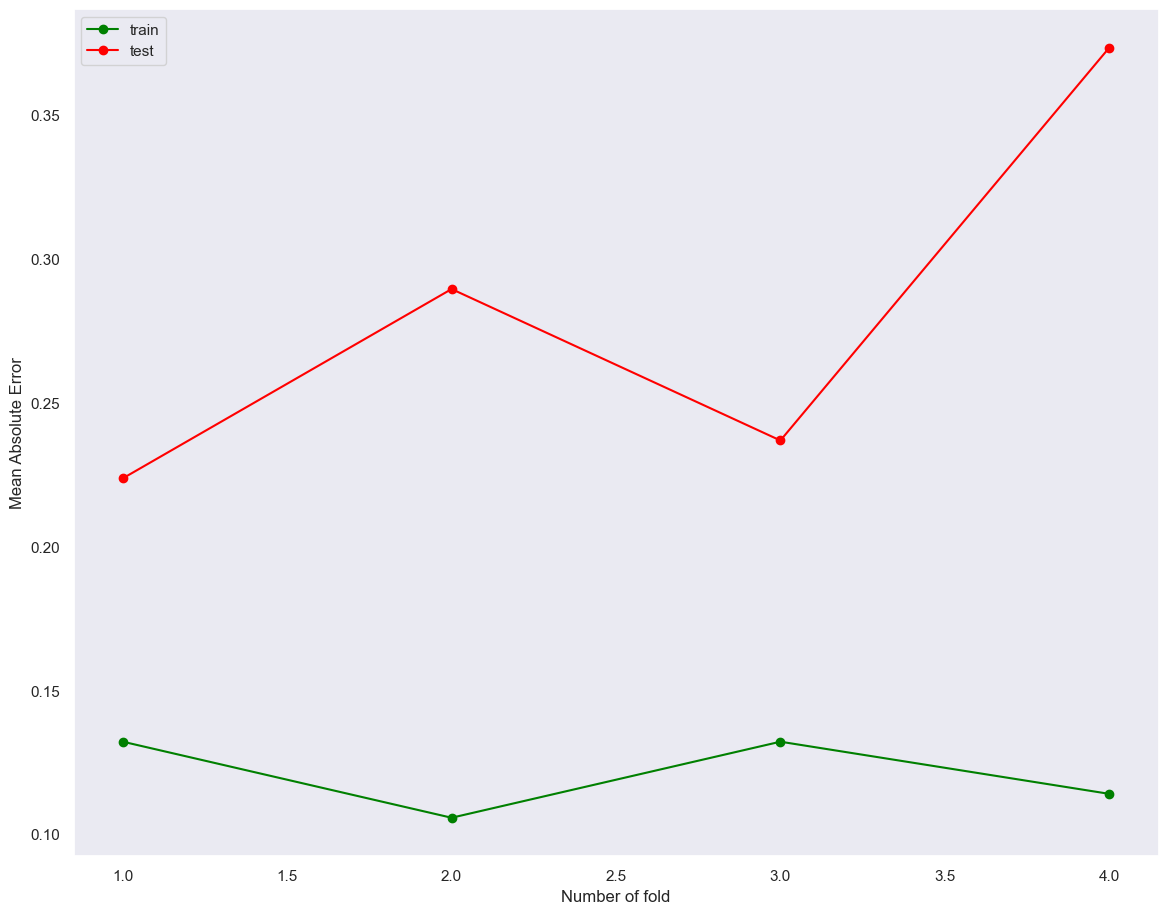

In [162]:
folds = range(1, Stackf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

Kết quả là một biểu đồ trong đó các giá trị lỗi từ tập huấn luyện có xu hướng giảm. Eror từ test set tuy có xu hướng tăng nhưng giá trị error vẫn rất nhỏ (<0.4) so với con số từ 0.3 - 0.8 trước đó. Stacking classifier vẫn giảm overfitting với phương pháp Đơn giản hóa. 

In [219]:
## KNN VỚI ĐƠN GIẢN HÓA DỮ LIỆU

In [163]:
kf = KFold(n_splits=4)
mae_train = []
mae_test = []
for train_index, test_index in kf.split(X):
    
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y[train_index], y[test_index]

   model_af = KNeighborsClassifier(n_neighbors=2)
   model_af.fit(X_train, y_train)
   y_train_pred = model_af.predict(X_train)
   y_test_pred = model_af.predict(X_test)
   mae_train.append(mean_absolute_error(y_train, y_train_pred))
   mae_test.append(mean_absolute_error(y_test, y_test_pred))

   print("1 Solution - Train mae: {} Test mae: {}".format(mae_train, mae_test))

1 Solution - Train mae: [0.1277533039647577] Test mae: [0.5]
1 Solution - Train mae: [0.1277533039647577, 0.11013215859030837] Test mae: [0.5, 0.4473684210526316]
1 Solution - Train mae: [0.1277533039647577, 0.11013215859030837, 0.1013215859030837] Test mae: [0.5, 0.4473684210526316, 0.27631578947368424]
1 Solution - Train mae: [0.1277533039647577, 0.11013215859030837, 0.1013215859030837, 0.10526315789473684] Test mae: [0.5, 0.4473684210526316, 0.27631578947368424, 0.26666666666666666]


In [164]:
model_af.fit(X_train, y_train ) 
answer = model_af.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        75
           1       0.00      0.00      0.00         0

    accuracy                           0.73        75
   macro avg       0.50      0.37      0.42        75
weighted avg       1.00      0.73      0.85        75



In [165]:
y_pred = model_af.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7333333333333333


In [167]:
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

55 / 75 correct


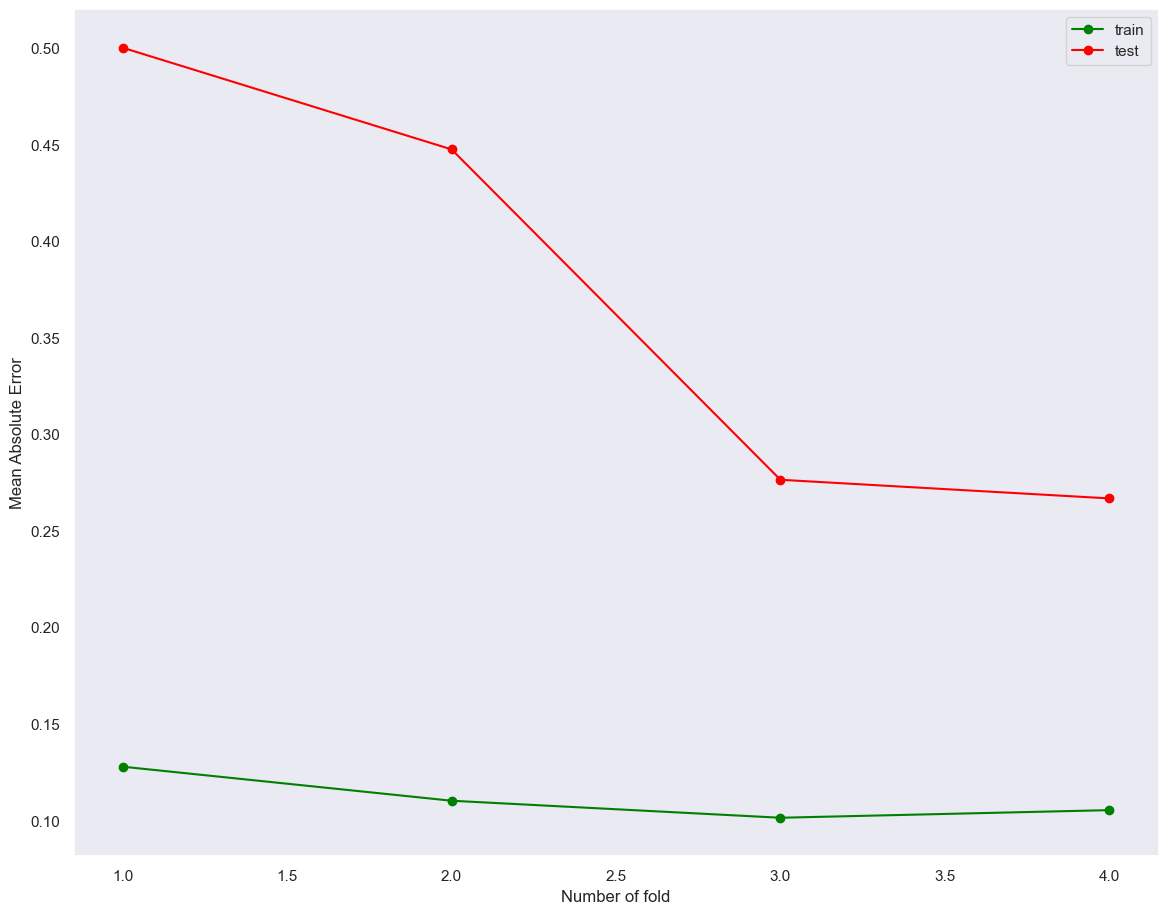

In [175]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

Kết quả là một biểu đồ trong đó các giá trị lỗi từ tét set có xu hướng giảm đáng kể so với gái trị đầu. Nó có thể là 0,25 - 0,50. 

# Select Feature
Sử dụng lựa chọn các tính năng quan trọng để mô hình không cần phải học hỏi quá nhiều tính năng.


In [251]:
from sklearn.preprocessing import MinMaxScaler ##bien X ve negative
import numpy as np
for column in X.columns:
    feature = np.array(X[column]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(feature)
    feature_scaled = scaler.transform(feature)
    X[column] = feature_scaled.reshape(1,-1)[0]


In [252]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_
dfscores = pd.DataFrame(fit.scores_)
dfcol = pd.DataFrame(X.columns)

In [253]:
featureScore = pd.concat([dfcol, dfscores], axis = 1)
featureScore.columns = ['Feature', 'Score']

print(featureScore.nlargest(4, 'Score'))

    Feature      Score
8      exng  38.914377
2        cp  20.866033
11      caa  16.610191
9   oldpeak  11.716815


In [254]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [255]:
#Get New Dataset after Feature Selection
X_new  = test.fit_transform(X,y)
print(X_new)

[[1.         0.         0.37096774 0.        ]
 [0.66666667 0.         0.56451613 0.        ]
 [0.33333333 0.         0.22580645 0.        ]
 ...
 [0.         0.         0.5483871  0.5       ]
 [0.         1.         0.19354839 0.25      ]
 [0.33333333 0.         0.         0.25      ]]


In [259]:
print('Original number of features:', X.shape)
print('Reduced number of features:', X_new.shape)


Original number of features: (303, 13)
Reduced number of features: (303, 4)


In [262]:
kf = KFold(n_splits=4)
mae_train_2 = []
mae_test_2 = []
for train_index, test_index in kf.split(X_new):
    
   X_train, X_test = X_new[train_index], X_new[test_index]
   y_train, y_test = y[train_index], y[test_index]

   model_af2 = KNeighborsClassifier(n_neighbors=2)
   model_af2.fit(X_train, y_train)
   y_train_pred = model_af2.predict(X_train)
   y_test_pred = model_af2.predict(X_test)
   mae_train_2.append(mean_absolute_error(y_train, y_train_pred))
   mae_test_2.append(mean_absolute_error(y_test, y_test_pred))
print("2 Solution - Train mae: {} Test mae: {}".format(mae_train_2, mae_test_2))


2 Solution - Train mae: [0.13215859030837004, 0.11894273127753303, 0.1145374449339207, 0.08771929824561403] Test mae: [0.5263157894736842, 0.4473684210526316, 0.19736842105263158, 0.29333333333333333]


In [263]:
model_af2.fit(X_train, y_train ) 
answer = model_af2.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        75
           1       0.00      0.00      0.00         0

    accuracy                           0.71        75
   macro avg       0.50      0.35      0.41        75
weighted avg       1.00      0.71      0.83        75



In [264]:
y_pred = model_af2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7066666666666667


In [265]:
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

53 / 75 correct


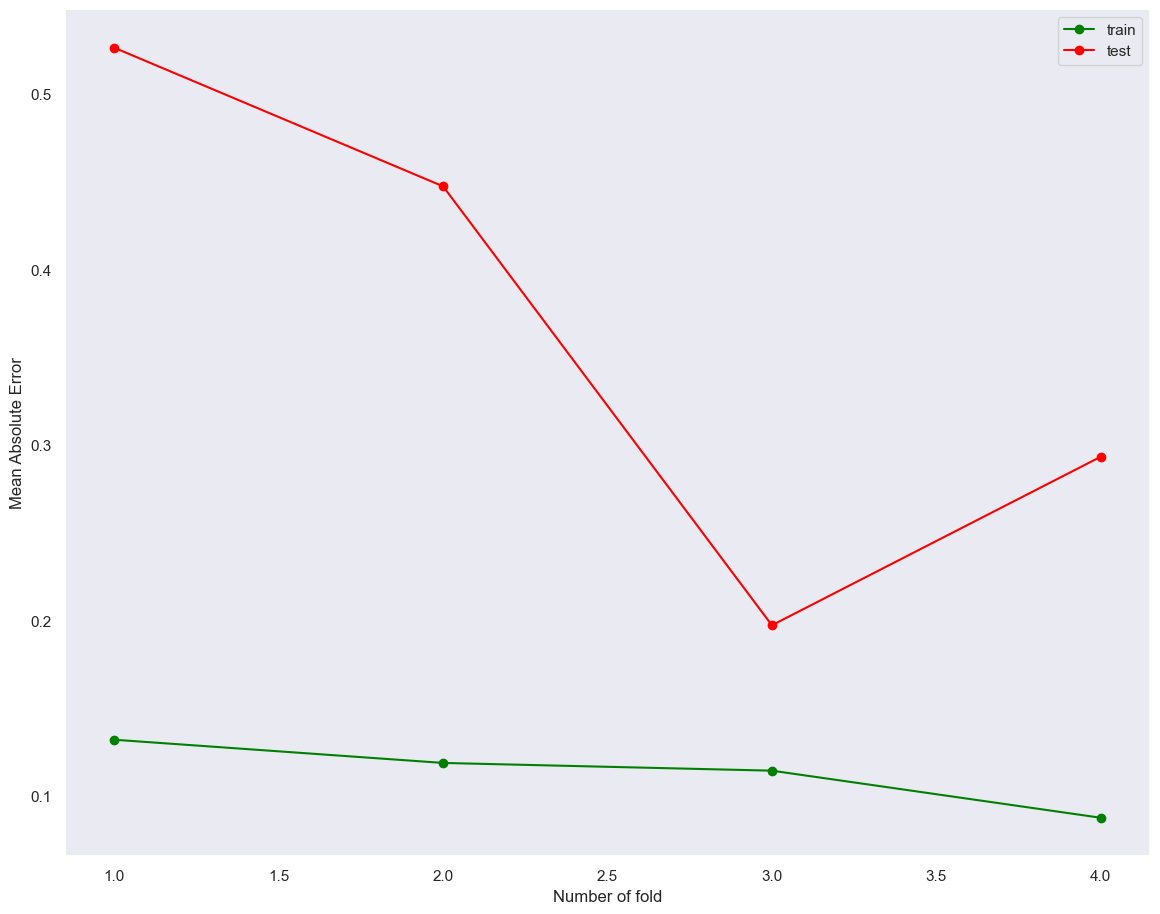

In [266]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train_2, 'o-', color='green', label='train')
plt.plot(folds, mae_test_2, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

Bằng cách sử dụng FS này, có thể thấy các giá trị MAE của mô hình giữa tập Huấn luyện và tập Kiểm tra đang bắt đầu xích lại gần nhau hơn từ 0.2 - 0.55

# Train một mô hình đơn giản khác 
Naive Bayes vì ​​đây là mô hình không quá phức tạp và khá đơn giản ở chỗ là hàm giả thuyết Simple (linear), giúp giảm thiểu vấn đề overfitting

In [279]:
#NaiveByes
from sklearn.naive_bayes import GaussianNB

kf = KFold(n_splits=4)
mae_train_gnb = []
mae_test_gnb = []
gnb = GaussianNB()
for train_index, test_index in kf.split(X):
    
   X_train_gnb, X_test_gnb = X.iloc[train_index], X.iloc[test_index]
   y_train_gnb, y_test_gnb = y[train_index], y[test_index]
   gnb.fit(X_train_gnb, y_train_gnb)
   y_train_pred_gnb = gnb.predict(X_train_gnb)
   y_test_pred_gnb = gnb.predict(X_test_gnb)

   print("Gnb model - Train mae: {} Test mae: {}".format(mae_train_gnb, mae_test_gnb))

   mae_train_gnb.append(mean_absolute_error(y_train_gnb, y_train_pred_gnb))
   mae_test_gnb.append(mean_absolute_error(y_test_gnb, y_test_pred_gnb))

Gnb model - Train mae: [] Test mae: []
Gnb model - Train mae: [0.15859030837004406] Test mae: [0.19736842105263158]
Gnb model - Train mae: [0.15859030837004406, 0.16740088105726872] Test mae: [0.19736842105263158, 0.21052631578947367]
Gnb model - Train mae: [0.15859030837004406, 0.16740088105726872, 0.14096916299559473] Test mae: [0.19736842105263158, 0.21052631578947367, 0.19736842105263158]


In [268]:
gnb.fit(X_train_gnb, y_train_gnb) 
answer = gnb.predict(X_test_gnb)
from sklearn.metrics import classification_report
print(classification_report(y_test_gnb, answer))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        75
           1       0.00      0.00      0.00         0

    accuracy                           0.65        75
   macro avg       0.50      0.33      0.40        75
weighted avg       1.00      0.65      0.79        75



In [269]:
y_pred = gnb.predict(X_test_gnb)
accuracy = accuracy_score(y_test_gnb, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6533333333333333


In [270]:
print("{0} / {1} correct".format(np.sum(y_test_gnb == y_pred), len(y_test_gnb)))

49 / 75 correct


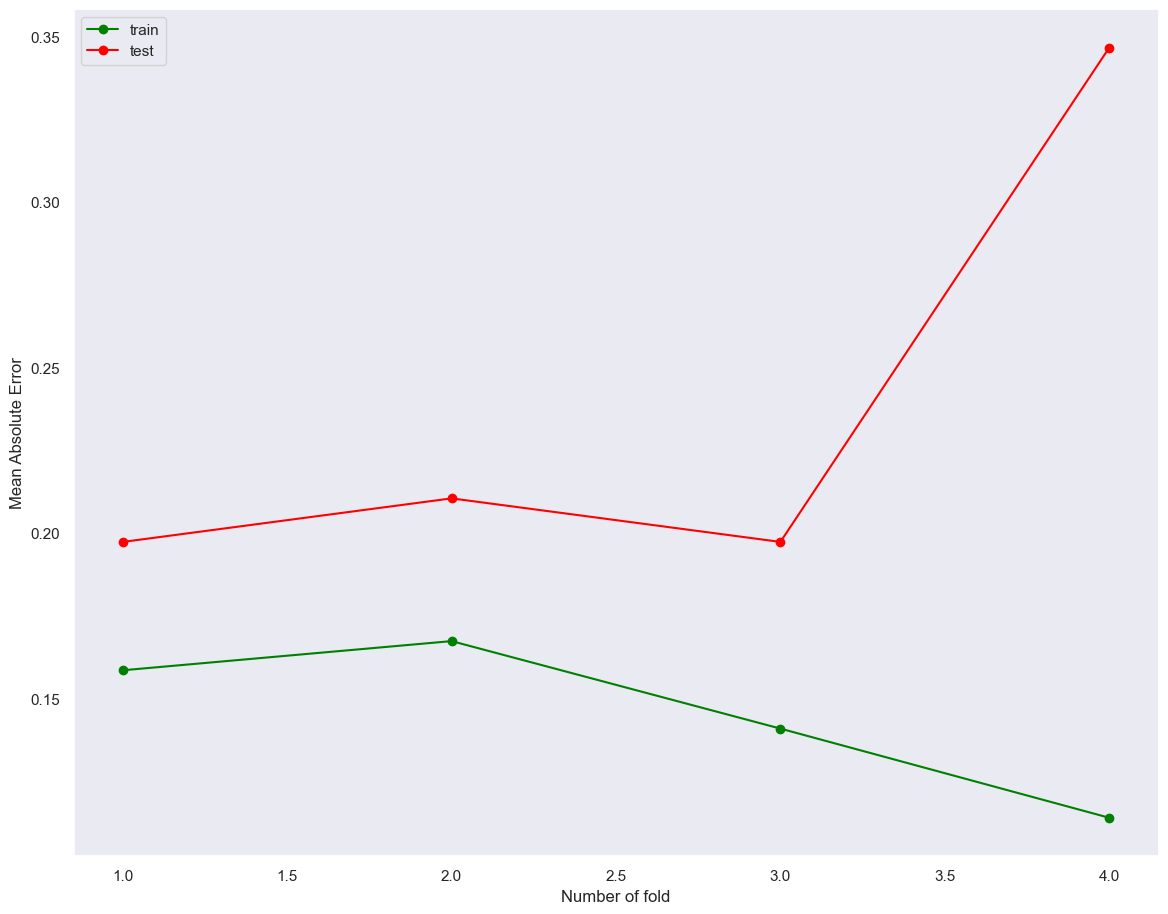

In [271]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train_gnb, 'o-', color='green', label='train')
plt.plot(folds, mae_test_gnb, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

MAE value mà Giá trị thu được chỉ nằm trong khoảng 0,20 - 0,35, tốt hơn so với KNN dù đã sử dụng featear selection.

# EARLY STOP với ADA Class
Giá trị mang tính tham khảo dựa trên ý tưởng chính là theo dõi hiệu suất và dừng quá trình huấn luyện khi không có cải thiện đáng kể.

In [277]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Epoch: 0 Accuracy: 0.6533333333333333
Epoch: 1 Accuracy: 0.68
Epoch: 2 Accuracy: 0.6666666666666666
Epoch: 3 Accuracy: 0.68
Epoch: 4 Accuracy: 0.6666666666666666
Epoch: 5 Accuracy: 0.64
Epoch: 6 Accuracy: 0.64
Epoch: 7 Accuracy: 0.6666666666666666
Epoch: 8 Accuracy: 0.6266666666666667
Epoch: 9 Accuracy: 0.6133333333333333
Epoch: 10 Accuracy: 0.68
Early stopping at epoch 10
Accuracy after early stopping: 0.68


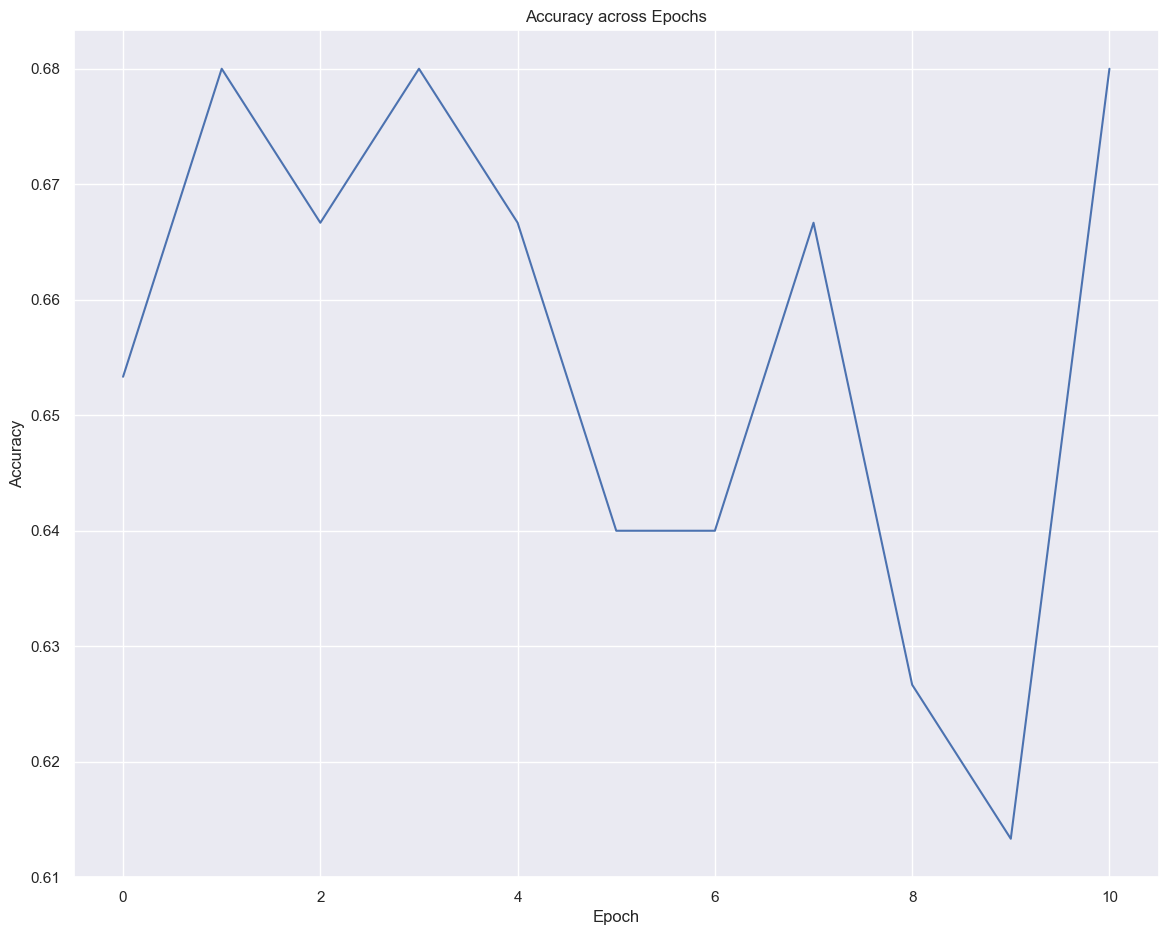

In [278]:
import matplotlib.pyplot as plt

# Khởi tạo các danh sách để lưu trữ thông tin của từng epoch
epoch_list = []
accuracy_list = []

# Áp dụng early stopping
best_model = None
best_accuracy = 0
tolerance = 9  # Số lượng epochs không có cải thiện mà chúng ta chấp nhận trước khi dừng lại
no_improvement_count = 0

for epoch in range(100):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Epoch:", epoch, "Accuracy:", accuracy)

    # Thêm thông tin vào danh sách
    epoch_list.append(epoch)
    accuracy_list.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= tolerance:
        print("Early stopping at epoch", epoch)
        break

# Đánh giá hiệu suất trên tập kiểm tra với mô hình tốt nhất đã được chọn
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after early stopping:", accuracy)

# Vẽ biểu đồ đường
plt.plot(epoch_list, accuracy_list)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy across Epochs')
plt.show()

# Cross validation
(được sử dụng nhiều trong bài từ những kỹ thuật ở trên) đánh giá mô hình trên nhiều tập dữ liệu khác nhau và đảm bảo rằng mô hình không chỉ hoạt động tốt trên tập huấn luyện mà còn tổng quát hóa tốt trên các tập dữ liệu mới và cũ.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

ADA:
Train Accuracy: 0.9868421052631579
Test Accuracy: 0.6
Cross-Validation Scores: [0.84782609 0.95652174 0.86956522 0.93333333 0.86666667]
Average Cross-Validation Score: 0.8947826086956521
SVM:
Train Accuracy: 0.7236842105263158
Test Accuracy: 0.0
Cross-Validation Scores: [0.7173913  0.7173913  0.7173913  0.73333333 0.73333333]
Average Cross-Validation Score: 0.723768115942029
Random Forest:
Train Accuracy: 1.0
Test Accuracy: 0.5333333333333333
Cross-Validation Scores: [0.89130435 0.89130435 0.7826087  0.88888889 0.91111111]
Average Cross-Validation Score: 0.8730434782608695


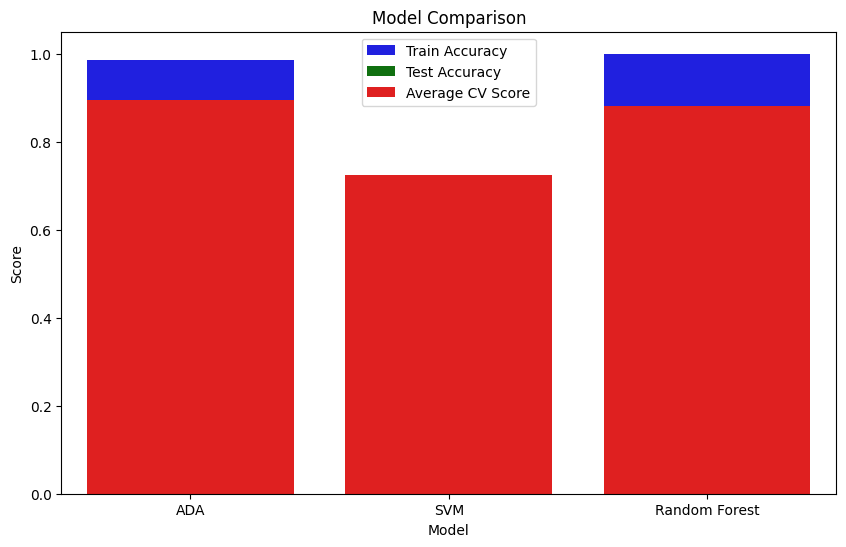

In [42]:

models = [
    ("ADA", AdaBoostClassifier()),
    ("SVM", SVC()),
    ("Random Forest", RandomForestClassifier())
]
results = []

# Huấn luyện và đánh giá từng mô hình
for name, model in models:
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập huấn luyện và tập kiểm tra
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Tính toán độ chính xác
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"{name}:")
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    avg_cv_score = np.mean(cv_scores)
    
    
    # Áp dụng kỹ thuật cross-validation để đánh giá mô hình
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Average Cross-Validation Score:", np.mean(cv_scores))
    
    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Average CV Score': avg_cv_score
    })

results_df = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Train Accuracy', data=results_df, label='Train Accuracy', color='b')
sns.barplot(x='Model', y='Test Accuracy', data=results_df, label='Test Accuracy', color='g')
sns.barplot(x='Model', y='Average CV Score', data=results_df, label='Average CV Score', color='r')

plt.title('Model Comparison')
plt.ylabel('Score')
plt.legend()
plt.show()